### 청소년 범죄 영향 인자 분석

#### 데이터 출처
1. 서울시 관서별 청소년 5배 범죄 현황(2015)(경찰청,www.data.go.kr)
2. 서울시 관서별 5대 범죄 현황(2015)(경찰청, www.data.go.kr)
3. 서울시 관서별 유흥업소수 현황(2015)(서울시, www.data.go.kr)

In [2]:
#### 실습 데이터 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nightlife_crime=pd.read_csv("nightlife_crime.csv", encoding="cp949")

#### nightlife_crime 의 변수내용, 변수종류
1. 변수내용
- region: 지역구명(서울시 구)
- pub: 유흥주점 수
- karaoke: 단란주점 수
- tot_nightlife: 유흥주점+단란주점 수
- murder: 청소년 살인범죄 발생건수
- robbery: 청소년 강도범죄 발생건수
- forcibe_rape: 청소년 강간추행 발생건수
- thef: 청소년 절도 발생건수
- violence: 청소년 폭행 발생건수
- murder_tot: 전체 살인범죄 발생건수(성인포함)
- robbery_Tot: 전체 강도범죄 발생건수(성인포함)
- forcible_rape_Tot: 전체 강간추행 발생건수(성인포함)
- thef_tot: 전체 절도 발생건수(성인포함)
- violence_Tot: 전체 폭행 발생건수(성인포함)

2. 변수종류
- region 변수의 경우 범주형변수(순서는 없음)에 해당
- 나머지 변수들의 경우 수치형변수- 이산형변수에 해당

In [10]:
nightlife_crime.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
0,강남,283,354,637,0,6,19,140,176,3,21,310,2484,2604
1,강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712
2,강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207
4,관악,223,99,322,0,2,14,170,209,9,12,320,2706,3298


In [11]:
nightlife_crime.tail()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
20,용산,38,129,167,0,4,4,56,70,5,14,194,1557,2050
21,은평,79,153,232,0,0,12,219,252,1,7,100,1215,1592
22,종로,229,140,369,0,5,6,72,86,3,8,117,1108,1307
23,중구,260,105,365,0,2,3,82,71,5,8,201,2509,2370
24,중랑,27,105,132,1,0,9,179,193,13,11,187,2135,2847


#### nightlife_crime 데이터의 위치추정, 대표값 탐색(location 변수 제외)

In [12]:
#중앙값 제외한 대표값들별로 열 추출
nightlife=pd.DataFrame(nightlife_crime.loc[:,['pub','karaoke','tot_nightlife','murder','robbery','forcible_rape','thef','violence','murder_tot','robbery_Tot','forcible_rape_Tot','thef_tot','violence_Tot']])

print("평균")
print(nightlife.mean())
print("-"*30)
print("합계")
print(nightlife.sum())
print("-"*30)
print("최소값")
print(nightlife.min())
print("-"*30)
print("최대값")
print(nightlife.max())
print("-"*30)
print("표준편차")
print(nightlife.std())
print("-"*30)
print("행의수")
print(nightlife.count())

평균
pub                    93.16
karaoke               121.68
tot_nightlife         214.84
murder                  0.12
robbery                 2.36
forcible_rape           9.80
thef                  147.20
violence              145.76
murder_tot              5.84
robbery_Tot            10.72
forcible_rape_Tot     199.20
thef_tot             1989.60
violence_Tot         2369.92
dtype: float64
------------------------------
합계
pub                   2329
karaoke               3042
tot_nightlife         5371
murder                   3
robbery                 59
forcible_rape          245
thef                  3680
violence              3644
murder_tot             146
robbery_Tot            268
forcible_rape_Tot     4980
thef_tot             49740
violence_Tot         59248
dtype: int64
------------------------------
최소값
pub                     7
karaoke                52
tot_nightlife          74
murder                  0
robbery                 0
forcible_rape           3
thef            

In [13]:
#중앙값 포함, 각 열마다의 대표값 추출
x=list(nightlife.columns)
x
for i in x:
    print(i+"\n")
    print("중앙값은=",np.median(nightlife[i])) #중앙값
    print("평균은=",nightlife[i].mean())
    print("합계는=",nightlife[i].sum())
    print("최소값은=",nightlife[i].min())
    print("최대값은=",nightlife[i].max())
    print("표준편차는=",nightlife[i].std())
    print("행의수는=",nightlife[i].count())
    print('-'*30)

pub

중앙값은= 71.0
평균은= 93.16
합계는= 2329
최소값은= 7
최대값은= 283
표준편차는= 82.72428099818497
행의수는= 25
------------------------------
karaoke

중앙값은= 105.0
평균은= 121.68
합계는= 3042
최소값은= 52
최대값은= 354
표준편차는= 70.02899399534452
행의수는= 25
------------------------------
tot_nightlife

중앙값은= 175.0
평균은= 214.84
합계는= 5371
최소값은= 74
최대값은= 637
표준편차는= 138.6388233264165
행의수는= 25
------------------------------
murder

중앙값은= 0.0
평균은= 0.12
합계는= 3
최소값은= 0
최대값은= 1
표준편차는= 0.33166247903553997
행의수는= 25
------------------------------
robbery

중앙값은= 2.0
평균은= 2.36
합계는= 59
최소값은= 0
최대값은= 6
표준편차는= 2.378374795247096
행의수는= 25
------------------------------
forcible_rape

중앙값은= 8.0
평균은= 9.8
합계는= 245
최소값은= 3
최대값은= 29
표준편차는= 6.075908711186062
행의수는= 25
------------------------------
thef

중앙값은= 146.0
평균은= 147.2
합계는= 3680
최소값은= 56
최대값은= 273
표준편차는= 51.636550362445135
행의수는= 25
------------------------------
violence

중앙값은= 144.0
평균은= 145.76
합계는= 3644
최소값은= 65
최대값은= 337
표준편차는= 70.22183895816647
행의수는= 25
------------------------------
murder_

In [14]:
nightlife.describe()

,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.00000,25.00000,25.000000,25.000000,25.000000
mean,93.160000,121.680000,214.840000,0.120000,2.360000,9.800000,147.20000,145.760000,5.84000,10.72000,199.200000,1989.600000,2369.920000
std,82.724281,70.028994,138.638823,0.331662,2.378375,6.075909,51.63655,70.221839,3.48425,4.68615,80.714001,664.605585,700.897991
min,7.000000,52.000000,74.000000,0.000000,0.000000,3.000000,56.00000,65.000000,1.00000,2.00000,70.000000,851.000000,1201.000000
25%,30.000000,81.000000,110.000000,0.000000,0.000000,6.000000,119.00000,76.000000,3.00000,7.00000,126.000000,1557.000000,1852.000000
50%,71.000000,105.000000,175.000000,0.000000,2.000000,8.000000,146.00000,144.000000,5.00000,9.00000,194.000000,1982.000000,2548.000000
75%,113.000000,129.000000,278.000000,0.000000,4.000000,12.000000,170.00000,193.000000,8.00000,14.00000,281.000000,2484.000000,2847.000000
max,283.000000,354.000000,637.000000,1.000000,6.000000,29.000000,273.00000,337.000000,14.00000,22.00000,334.000000,3239.000000,3572.000000


#### nightlife_crime의 분산도 탐색

In [15]:
x=list(nightlife.columns)
x
for i in x:
    print(i)
    print(nightlife[i].std()) #표준편차
    print(nightlife[i].var()) #분산

pub
82.72428099818497
6843.306666666666
karaoke
70.02899399534452
4904.0599999999995
tot_nightlife
138.6388233264165
19220.72333333333
murder
0.33166247903553997
0.10999999999999999
robbery
2.378374795247096
5.656666666666666
forcible_rape
6.075908711186062
36.91666666666668
thef
51.636550362445135
2666.333333333333
violence
70.22183895816647
4931.106666666666
murder_tot
3.484250278036869
12.139999999999999
robbery_Tot
4.686149805543993
21.959999999999997
forcible_rape_Tot
80.71400126372127
6514.75
thef_tot
664.6055847894548
441700.5833333333
violence_Tot
700.8979906757711
491257.99333333335


#### nightlife_crime의 분포 탐색

In [16]:
#사분위수
for i in x:
    print(i+"\n")
    print("최소값=",np.percentile(nightlife[i],0))
    print("1/4=",np.percentile(nightlife[i],25))
    print("2/4=",np.percentile(nightlife[i],50))
    print("3/4=",np.percentile(nightlife[i],75))
    print("최대값=",np.percentile(nightlife[i],100))
    print("-"*30)

pub

최소값= 7.0
1/4= 30.0
2/4= 71.0
3/4= 113.0
최대값= 283.0
------------------------------
karaoke

최소값= 52.0
1/4= 81.0
2/4= 105.0
3/4= 129.0
최대값= 354.0
------------------------------
tot_nightlife

최소값= 74.0
1/4= 110.0
2/4= 175.0
3/4= 278.0
최대값= 637.0
------------------------------
murder

최소값= 0.0
1/4= 0.0
2/4= 0.0
3/4= 0.0
최대값= 1.0
------------------------------
robbery

최소값= 0.0
1/4= 0.0
2/4= 2.0
3/4= 4.0
최대값= 6.0
------------------------------
forcible_rape

최소값= 3.0
1/4= 6.0
2/4= 8.0
3/4= 12.0
최대값= 29.0
------------------------------
thef

최소값= 56.0
1/4= 119.0
2/4= 146.0
3/4= 170.0
최대값= 273.0
------------------------------
violence

최소값= 65.0
1/4= 76.0
2/4= 144.0
3/4= 193.0
최대값= 337.0
------------------------------
murder_tot

최소값= 1.0
1/4= 3.0
2/4= 5.0
3/4= 8.0
최대값= 14.0
------------------------------
robbery_Tot

최소값= 2.0
1/4= 7.0
2/4= 9.0
3/4= 14.0
최대값= 22.0
------------------------------
forcible_rape_Tot

최소값= 70.0
1/4= 126.0
2/4= 194.0
3/4= 281.0
최대값= 334.0
--------------------

#### nightlife_crime의 분포탐색, 분포시각화

In [17]:
import matplotlib
from matplotlib import font_manager,rc 
#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

import matplotlib.pyplot as plt
%matplotlib inline

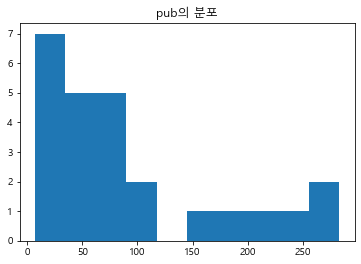

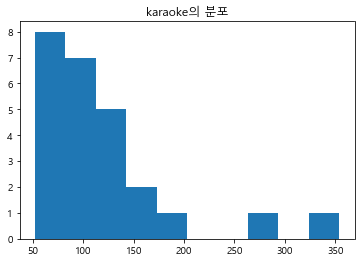

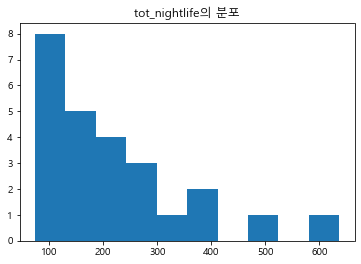

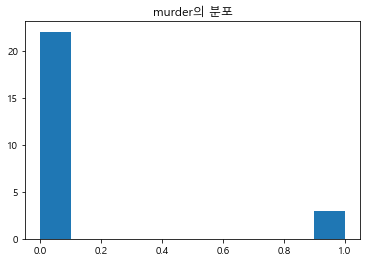

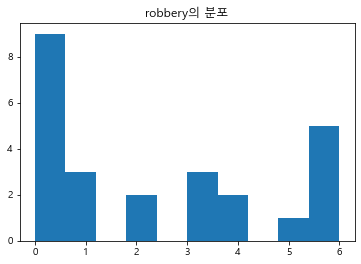

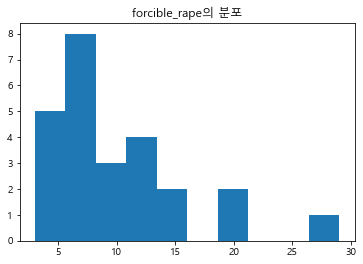

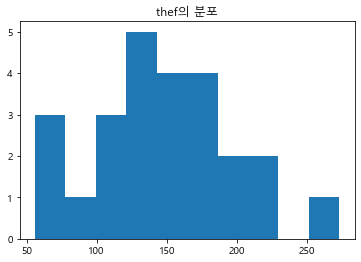

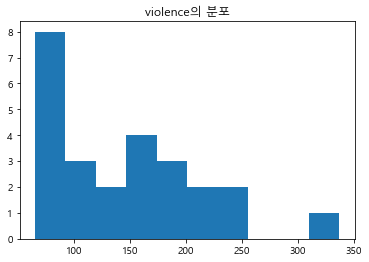

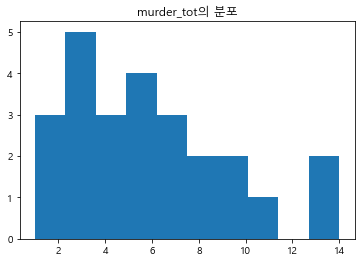

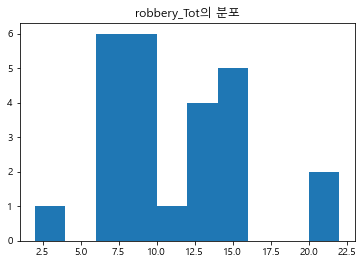

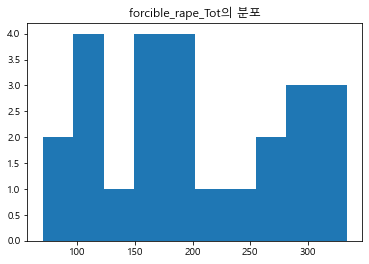

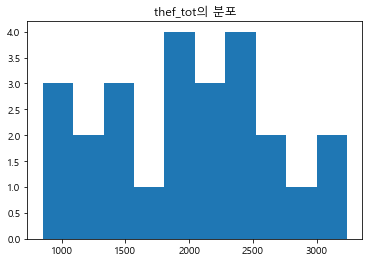

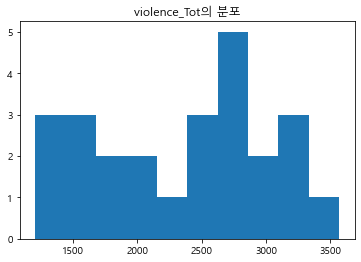

In [18]:
# 각 column 별 히스토그램
# x,y축 둘다 수치형이어야 해서 지역구별 분포를 확인할수없었음
for i in x:
    plt.figure()
    plt.hist(nightlife_crime[i],bins=10)
    plt.title(i+"의 분포")

region
강남     0
강동     0
강북     0
강서     0
관악     0
광진     0
구로     0
금천     0
노원     0
도봉     0
동대문    1
동작     1
마포     0
서대문    0
서초     0
성동     0
성북     0
송파     0
양천     0
영등포    0
용산     0
은평     0
종로     0
중구     0
중랑     1
Name: murder, dtype: int64


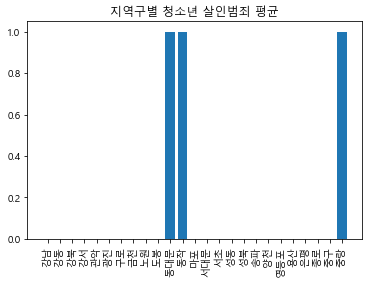

In [22]:
#막대그래프 murder column으로 실습
data=nightlife_crime["murder"].groupby(nightlife_crime["region"])
print(data.mean())

years=[]
for i in nightlife_crime["region"]:
    years.append(i)
    
plt.title("지역구별 청소년 살인범죄 평균")
plt.bar(years,data.mean())
plt.xticks(rotation=90)
plt.show()

In [23]:
#전체 지역구별 column의 평균
for i in x:
    data=nightlife_crime[i].groupby(nightlife_crime["region"])
    y=[]
    y.append(data.mean())
    print(y)

[region
강남     283
강동     146
강북      79
강서     113
관악     223
광진      19
구로      38
금천      60
노원      30
도봉      21
동대문     88
동작      55
마포      71
서대문     48
서초      88
성동      22
성북       8
송파      97
양천       7
영등포    200
용산      38
은평      79
종로     229
중구     260
중랑      27
Name: pub, dtype: int64]
[region
강남     354
강동     106
강북     128
강서     167
관악      99
광진      91
구로     110
금천      82
노원      57
도봉      55
동대문    115
동작      55
마포     104
서대문     81
서초     120
성동      52
성북      79
송파     181
양천      81
영등포    293
용산     129
은평     153
종로     140
중구     105
중랑     105
Name: karaoke, dtype: int64]
[region
강남     637
강동     252
강북     207
강서     280
관악     322
광진     110
구로     148
금천     142
노원      87
도봉      76
동대문    203
동작     110
마포     175
서대문    129
서초     208
성동      74
성북      87
송파     278
양천      88
영등포    493
용산     167
은평     232
종로     369
중구     365
중랑     132
Name: tot_nightlife, dtype: int64]
[region
강남     0
강동     0
강북     0
강서     0
관악     0
광진     0


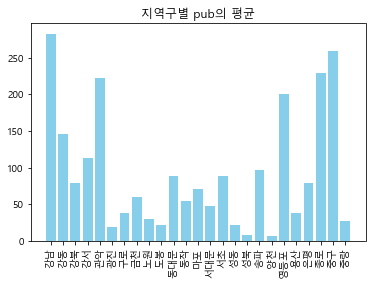

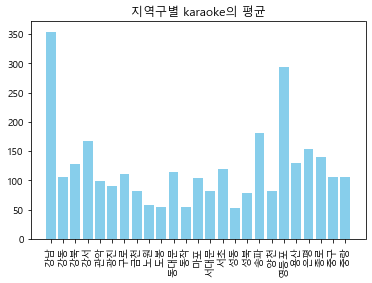

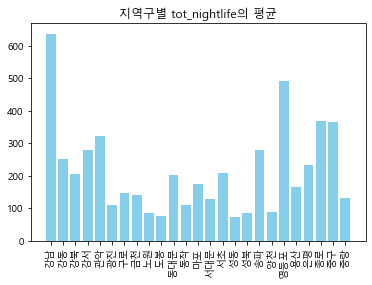

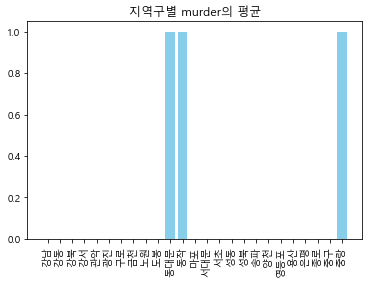

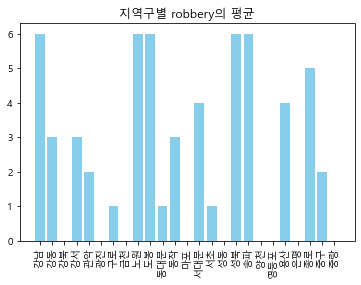

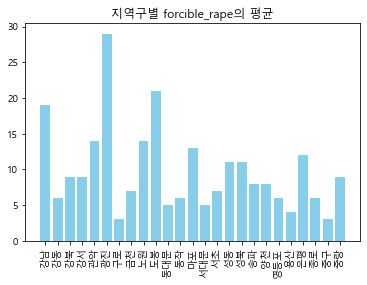

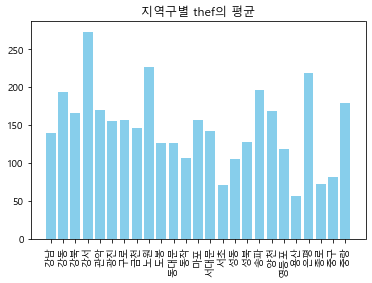

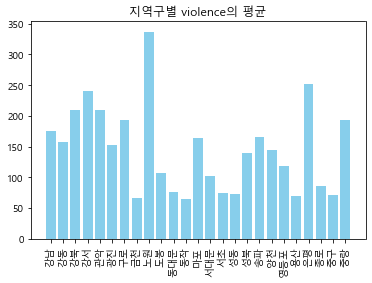

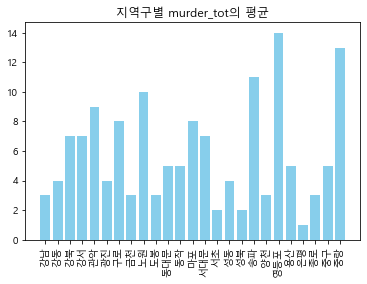

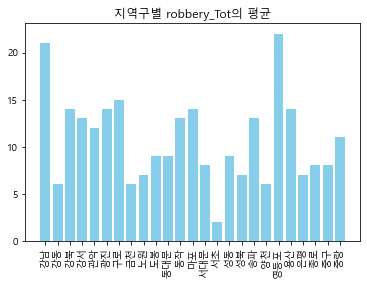

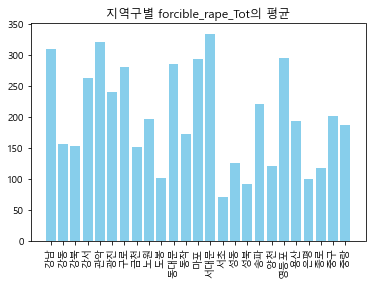

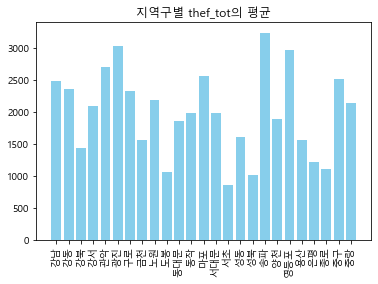

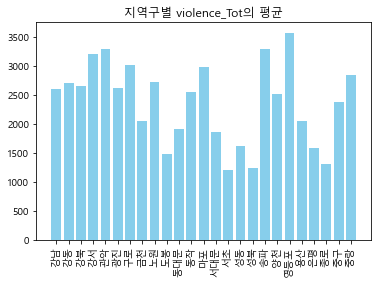

In [24]:
#전체 지역구별 column의 막대그래프 그리기
for i in x:
    data=nightlife_crime[i].groupby(nightlife_crime["region"])
    y=[]
    y.append(data.mean())
    

    years=[]
    for j in nightlife_crime["region"]:
        years.append(j)
    for num in y:
        plt.title("지역구별 "+i+"의 평균")
        bars=plt.bar(years,num,color="skyblue")
        plt.xticks(rotation=90)
        plt.show()

region
강남     341
강동     360
강북     385
강서     525
관악     395
광진     337
구로     355
금천     219
노원     584
도봉     260
동대문    209
동작     182
마포     333
서대문    254
서초     154
성동     189
성북     284
송파     375
양천     321
영등포    243
용산     134
은평     483
종로     169
중구     158
중랑     382
Name: totcrime, dtype: int64


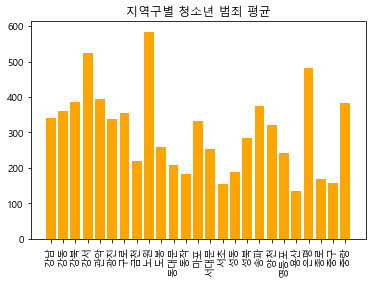

In [54]:
nightlife_crime['totcrime']= nightlife_crime['murder']+nightlife_crime['robbery']+nightlife_crime['forcible_rape']+nightlife_crime['thef']+nightlife_crime['violence']

#막대그래프 murder column으로 실습
data=nightlife_crime["totcrime"].groupby(nightlife_crime["region"])
print(data.mean())

years=[]
for i in nightlife_crime["region"]:
    years.append(i)
    
plt.title("지역구별 청소년 범죄 평균")
plt.bar(years,data.mean(),color="orange")
plt.xticks(rotation=90)
plt.show()

In [ ]:
tot_crime = nightlife_crime[["murder","robbery","forcible_rape","thef","violence"]] 


Text(0.5, 1.0, '지역구별 청소년 살인 범죄')

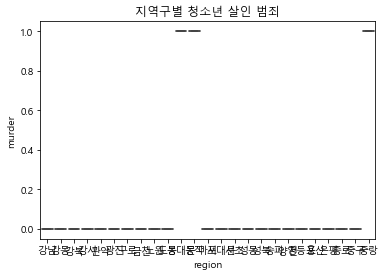

In [25]:
#상자그래프
sns.boxplot(x="region",y="murder",data=nightlife_crime)
plt.title("지역구별 청소년 살인 범죄")

Text(0.5, 1.0, '지역구별 청소년 살인 범죄')

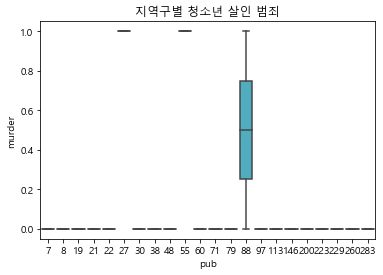

In [26]:
a=['murder','robbery','forcible_rape','thef','violence']
sns.boxplot(x="pub",y="murder", data=nightlife_crime)
plt.title("지역구별 청소년 살인 범죄")

Text(0.5, 1.0, '지역구별 청소년 강도 범죄')

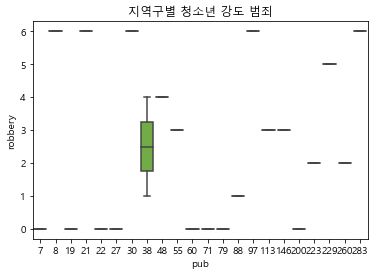

In [27]:
sns.boxplot(x="pub",y='robbery', data=nightlife_crime)
plt.title("지역구별 청소년 강도 범죄")

Text(0.5, 1.0, '지역구별 청소년 강간추행 범죄')

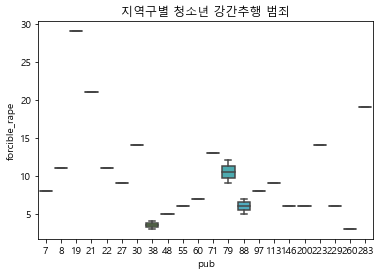

In [28]:
sns.boxplot(x="pub",y='forcible_rape', data=nightlife_crime)
plt.title("지역구별 청소년 강간추행 범죄")

Text(0.5, 1.0, '지역구별 청소년 절도 범죄')

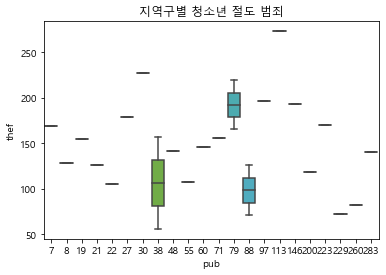

In [29]:
sns.boxplot(x="pub",y='thef', data=nightlife_crime)
plt.title("지역구별 청소년 절도 범죄")

Text(0.5, 1.0, '지역구별 청소년 폭행 범죄')

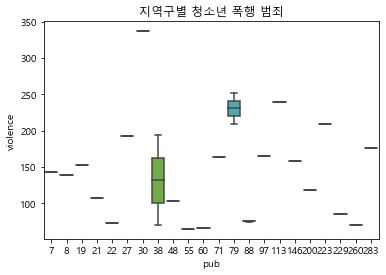

In [30]:
sns.boxplot(x="pub",y='violence', data=nightlife_crime)
plt.title("지역구별 청소년 폭행 범죄")

#### nightlife_crime의 관계시각화 (산점도그래프)

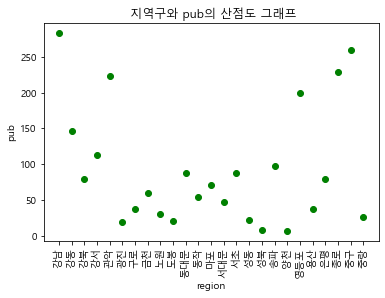

In [31]:
#지역구와 pub의 산점도그래프
plt.plot(nightlife_crime["region"], nightlife_crime["pub"], 'bo', color='green')
plt.xlabel('region')  
plt.ylabel('pub') 
plt.title(" 지역구와 pub의 산점도 그래프")
plt.xticks(rotation=90)
plt.show()

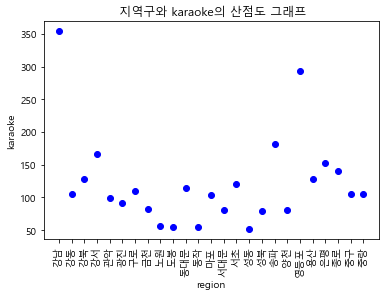

In [32]:
#지역구와 karaoke의 산점도그래프
plt.plot(nightlife_crime["region"], nightlife_crime["karaoke"], 'bo', color='blue')
plt.xlabel('region')  
plt.ylabel('karaoke') 
plt.title(" 지역구와 karaoke의 산점도 그래프")
plt.xticks(rotation=90)
plt.show()

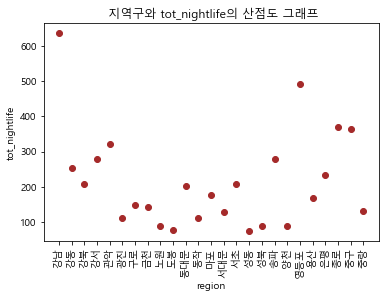

In [33]:
#지역구와 tot_nightlife의 산점도그래프
plt.plot(nightlife_crime["region"], nightlife_crime["tot_nightlife"], 'bo', color='brown')
plt.xlabel('region')  
plt.ylabel('tot_nightlife') 
plt.title(" 지역구와 tot_nightlife의 산점도 그래프")
plt.xticks(rotation=90)
plt.show()

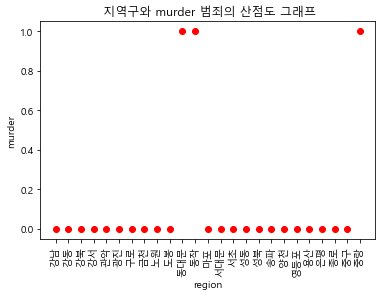

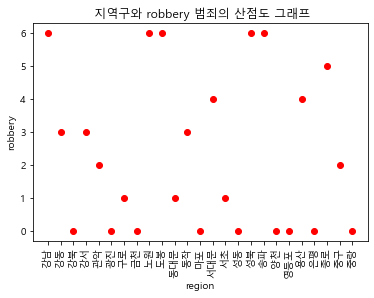

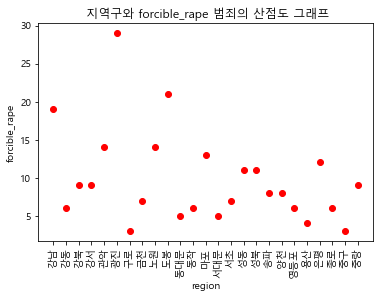

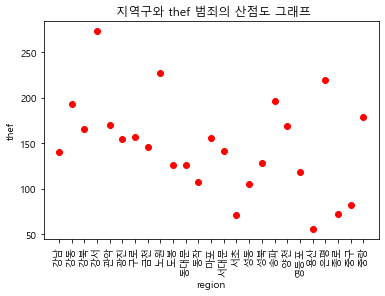

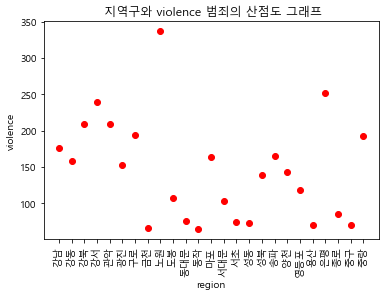

In [34]:
#지역구와 청소년 5대범죄의 산점도 그래프
a=['murder','robbery','forcible_rape','thef','violence']
for i in a:
    plt.plot(nightlife_crime['region'], nightlife_crime[i], 'bo', color='red')
    plt.xlabel('region')  
    plt.ylabel(i) 
    plt.title(" 지역구와 "+i+" 범죄의 산점도 그래프")
    plt.xticks(rotation=90)
    plt.show()

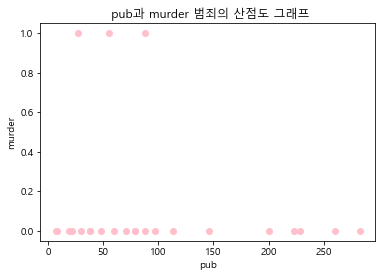

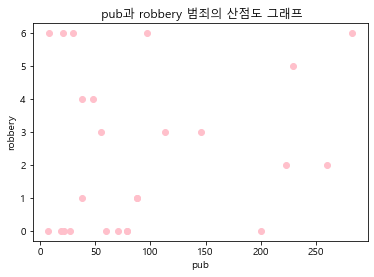

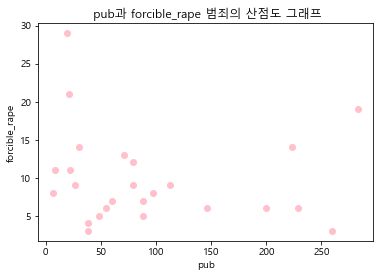

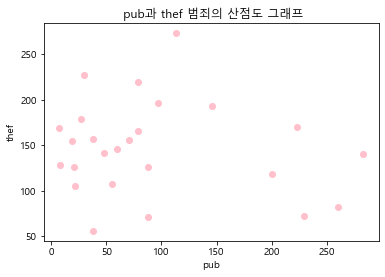

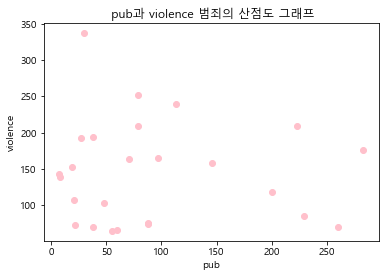

In [35]:
#pub과 청소년 5대범죄의 산점도 그래프
a=['murder','robbery','forcible_rape','thef','violence']
for i in a:
    plt.plot(nightlife_crime['pub'], nightlife_crime[i], 'bo', color='pink')
    plt.xlabel('pub')  
    plt.ylabel(i) 
    plt.title(" pub과 "+i+" 범죄의 산점도 그래프")
    plt.show()

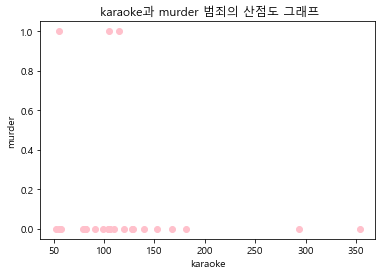

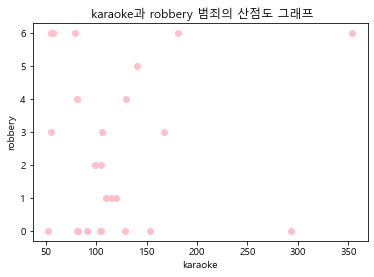

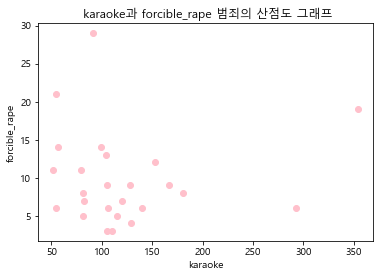

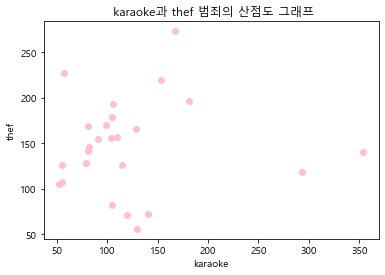

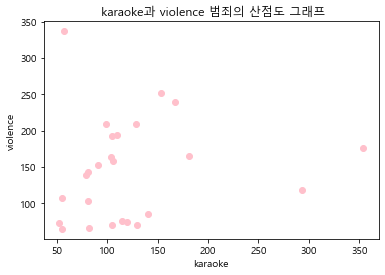

In [36]:
#karaoke과 청소년 5대범죄의 산점도 그래프
a=['murder','robbery','forcible_rape','thef','violence']
for i in a:
    plt.plot(nightlife_crime['karaoke'], nightlife_crime[i], 'bo', color='pink')
    plt.xlabel('karaoke')  
    plt.ylabel(i) 
    plt.title(" karaoke과 "+i+" 범죄의 산점도 그래프")
    plt.show()

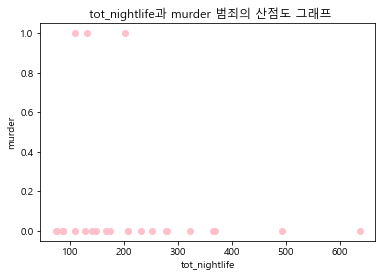

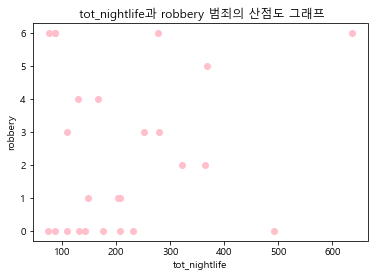

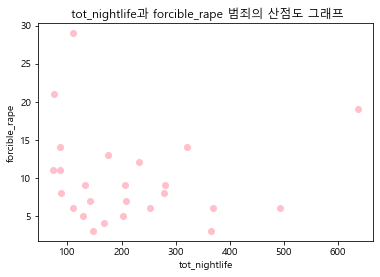

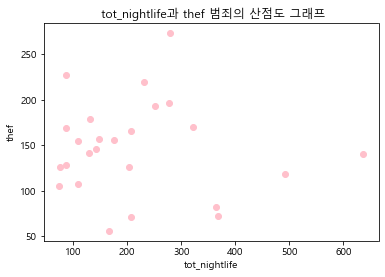

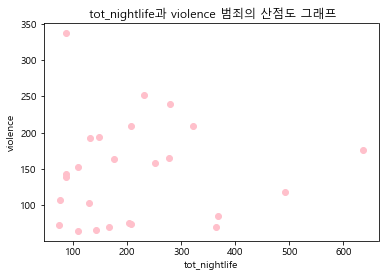

In [37]:
#tot_nightlife과 청소년 5대범죄의 산점도 그래프
a=['murder','robbery','forcible_rape','thef','violence']
for i in a:
    plt.plot(nightlife_crime['tot_nightlife'], nightlife_crime[i], 'bo', color='pink')
    plt.xlabel('tot_nightlife')  
    plt.ylabel(i) 
    plt.title(" tot_nightlife과 "+i+" 범죄의 산점도 그래프")
    plt.show()

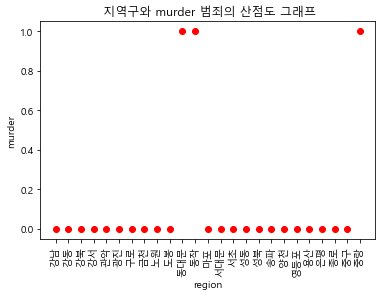

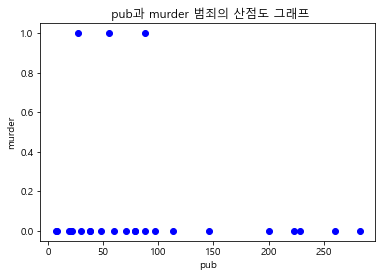

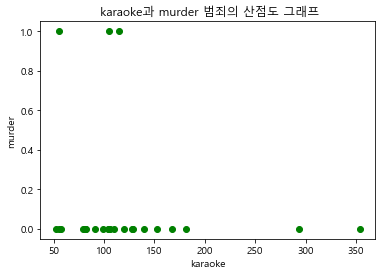

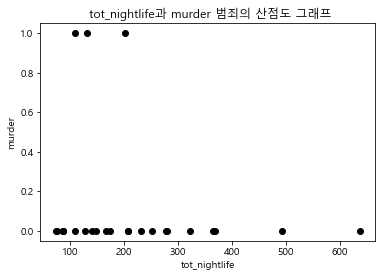

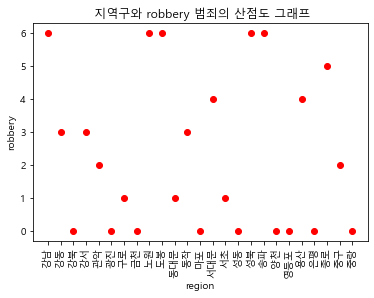

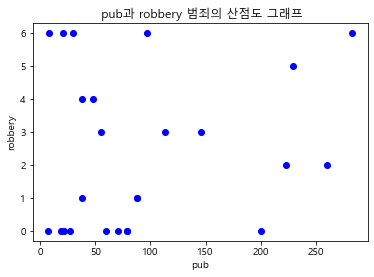

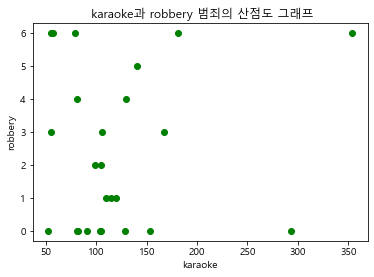

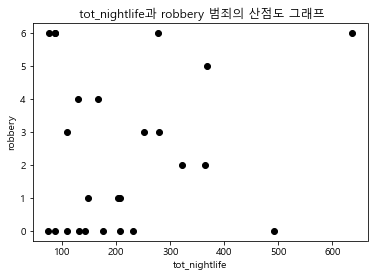

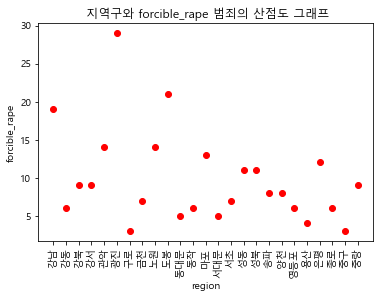

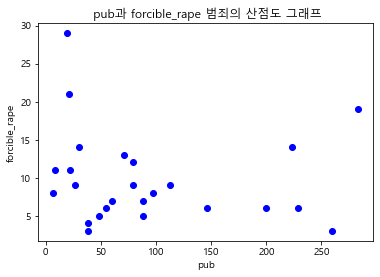

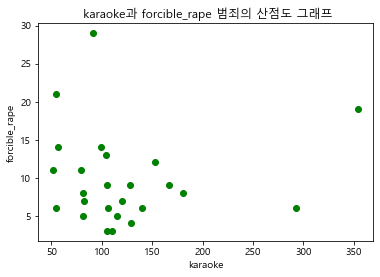

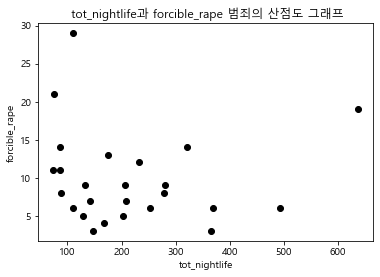

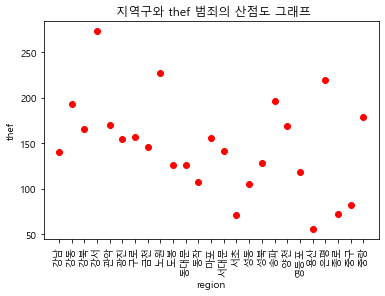

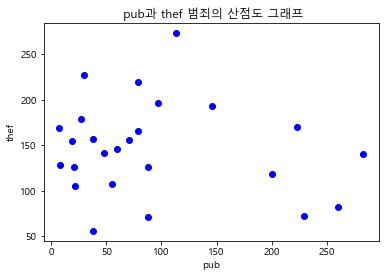

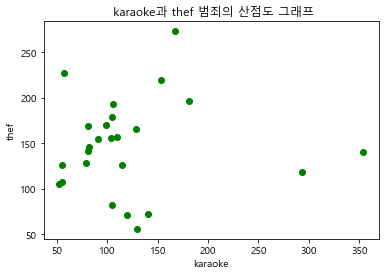

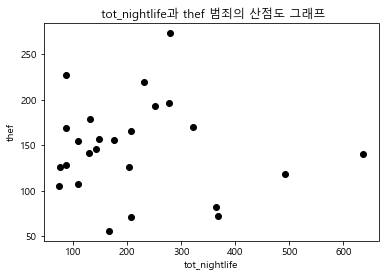

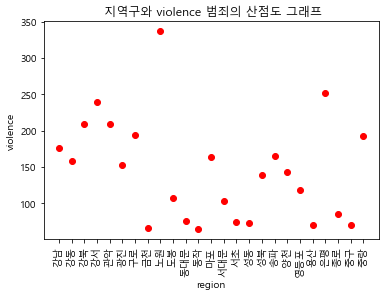

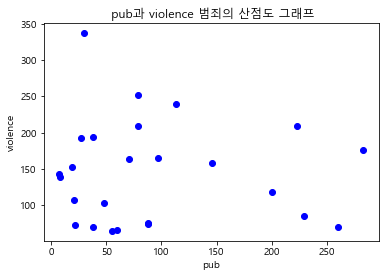

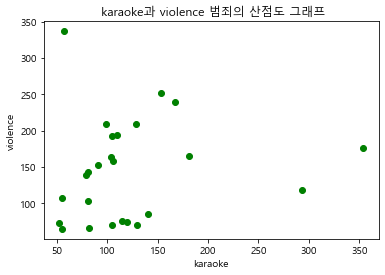

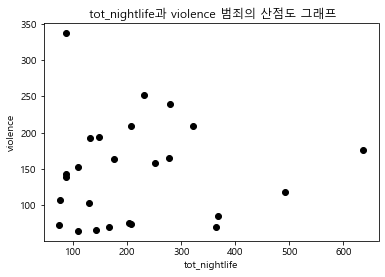

In [38]:
#지역구와 청소년 5대범죄의 산점도 그래프
a=['murder','robbery','forcible_rape','thef','violence']
for i in a:
    plt.plot(nightlife_crime['region'], nightlife_crime[i], 'bo', color='red')
    plt.xlabel('region')  
    plt.ylabel(i) 
    plt.title(" 지역구와 "+i+" 범죄의 산점도 그래프")
    plt.xticks(rotation=90)
    plt.show()
    plt.plot(nightlife_crime['pub'], nightlife_crime[i], 'bo', color='blue')
    plt.xlabel('pub')  
    plt.ylabel(i) 
    plt.title(" pub과 "+i+" 범죄의 산점도 그래프")
    plt.show()
    plt.plot(nightlife_crime['karaoke'], nightlife_crime[i], 'bo', color='green')
    plt.xlabel('karaoke')  
    plt.ylabel(i) 
    plt.title(" karaoke과 "+i+" 범죄의 산점도 그래프")
    plt.show()
    plt.plot(nightlife_crime['tot_nightlife'], nightlife_crime[i], 'bo', color='black')
    plt.xlabel('tot_nightlife')  
    plt.ylabel(i) 
    plt.title(" tot_nightlife과 "+i+" 범죄의 산점도 그래프")
    plt.show()
            

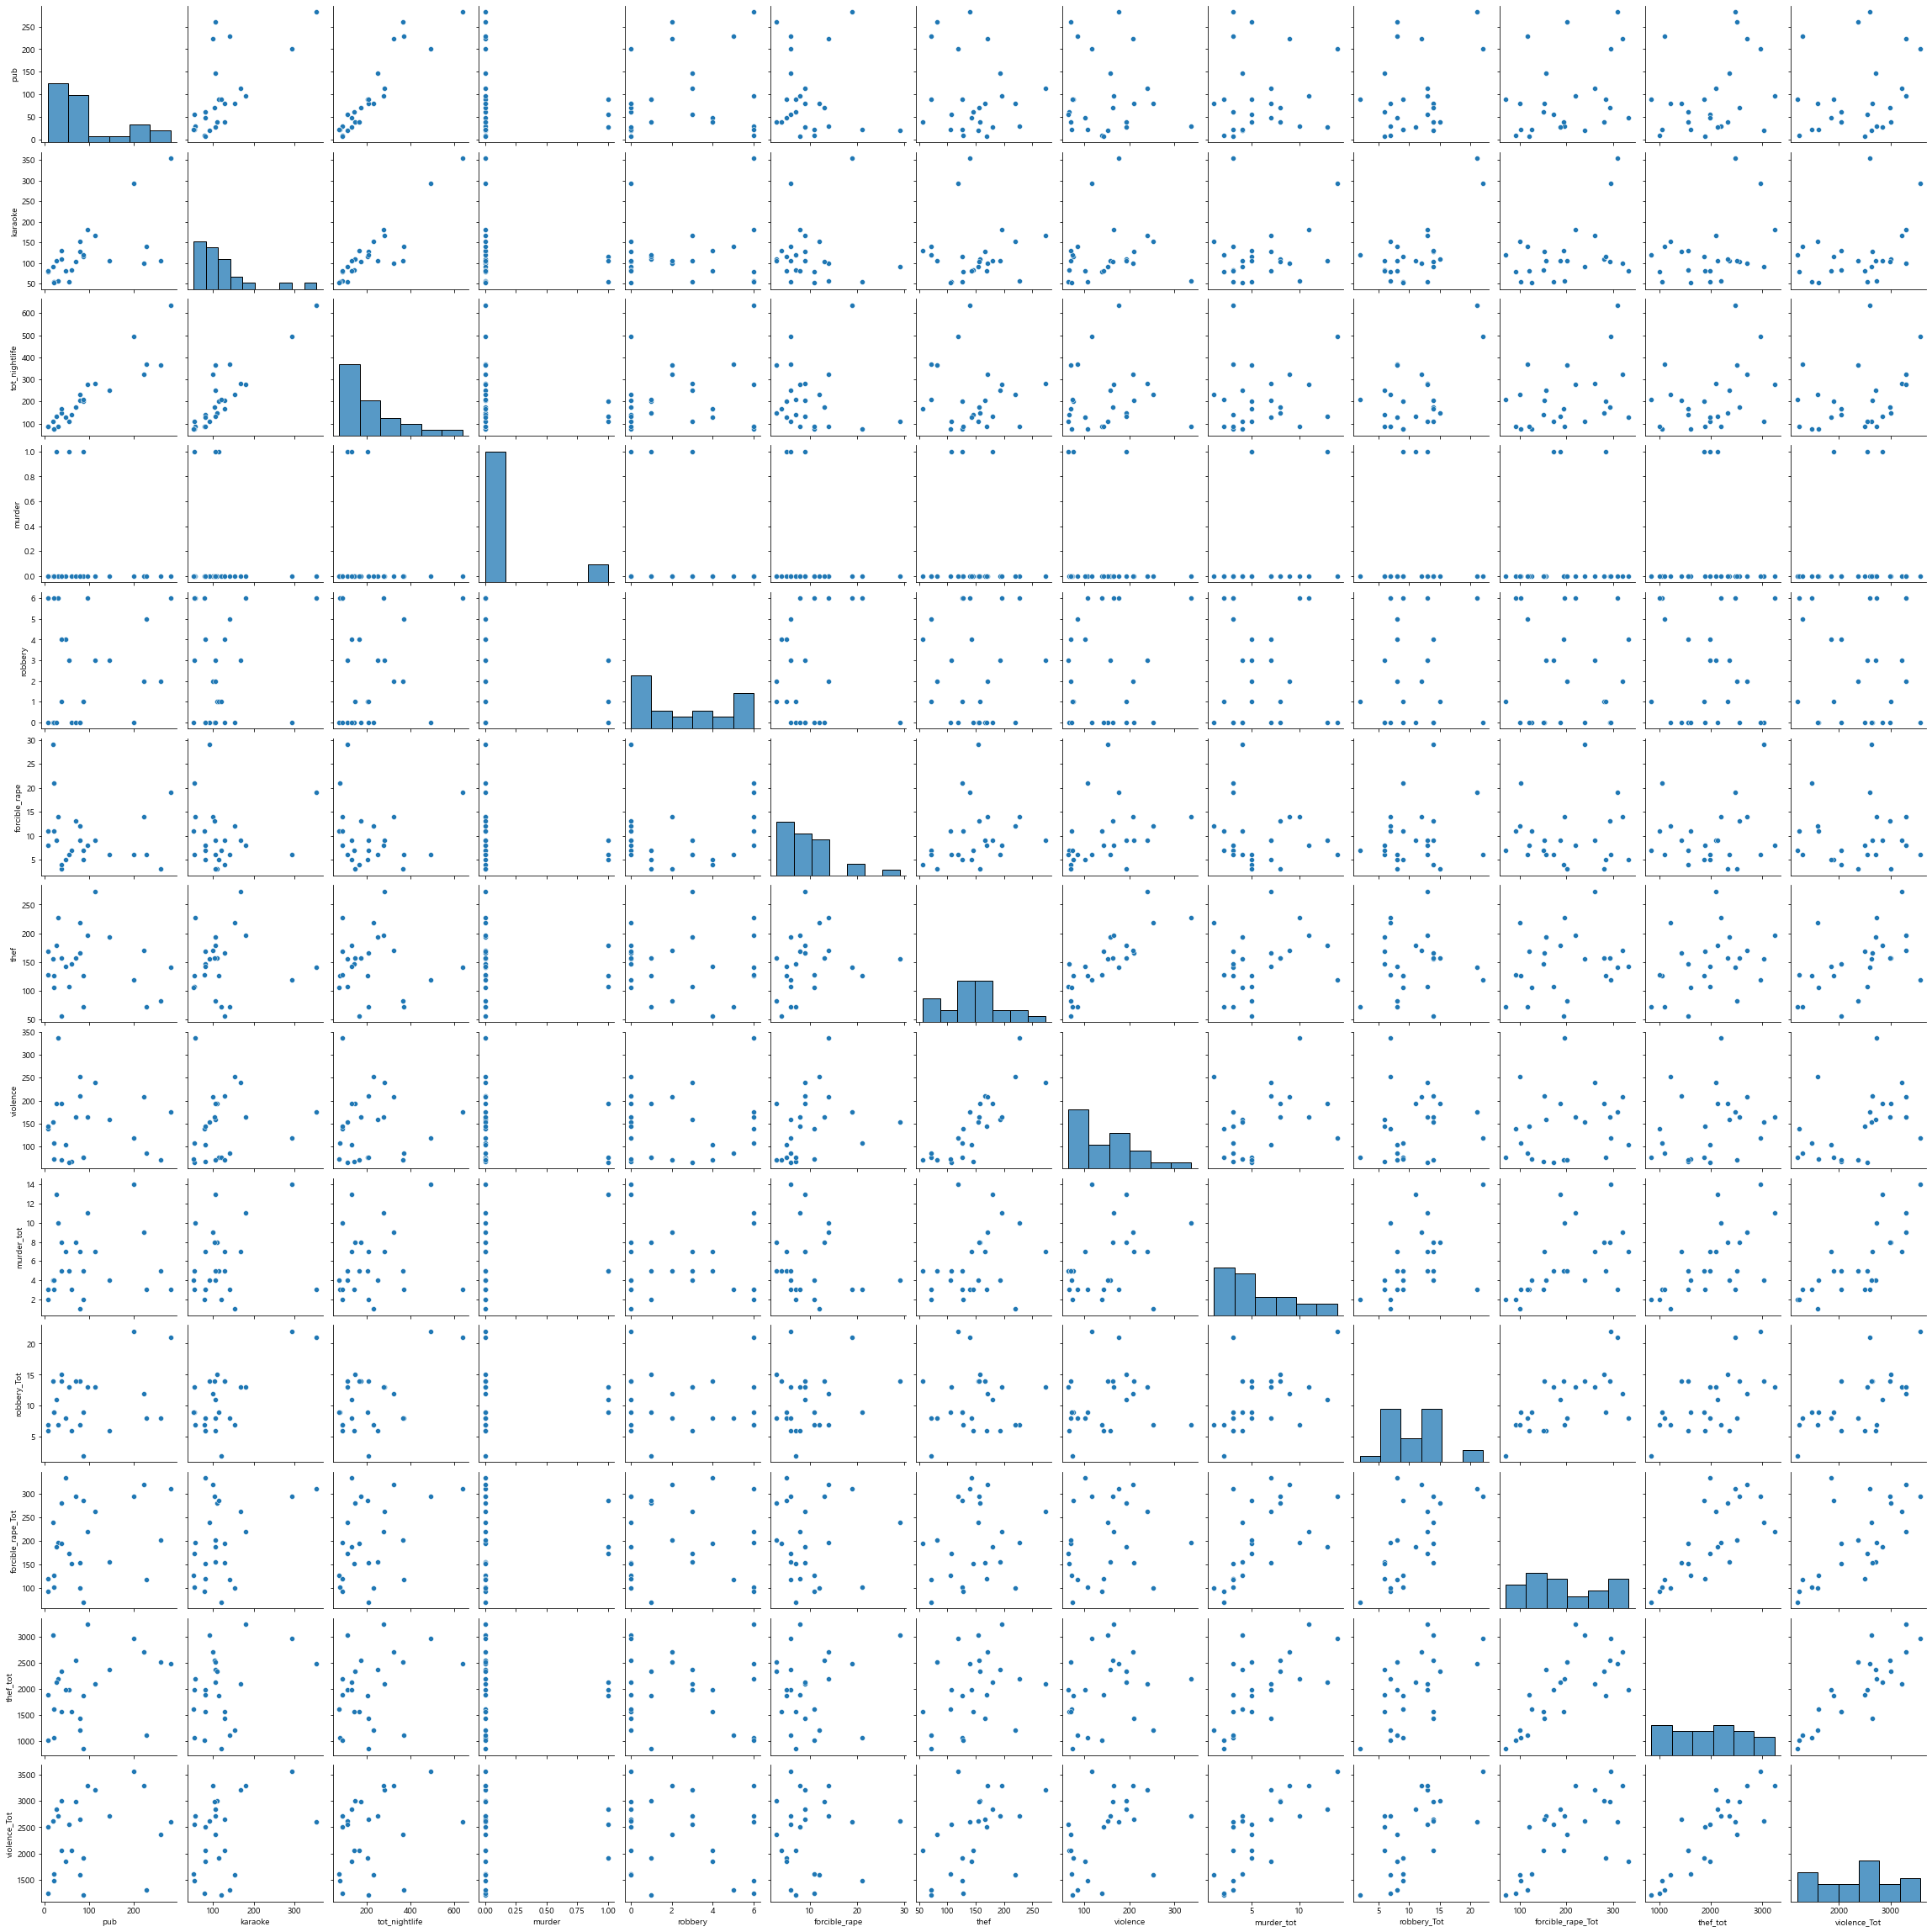

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(nightlife_crime)
plt.show()

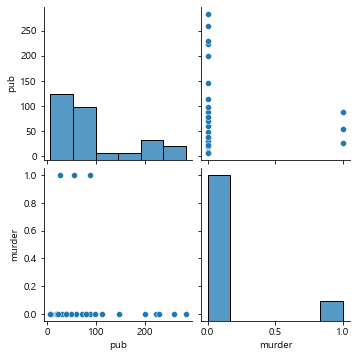

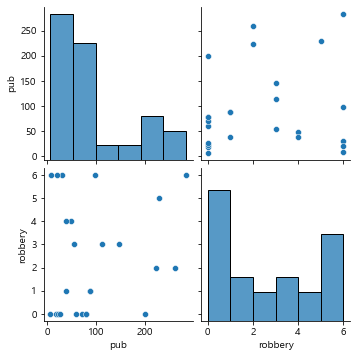

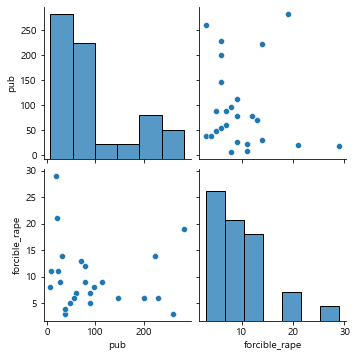

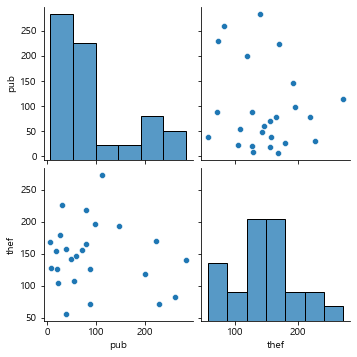

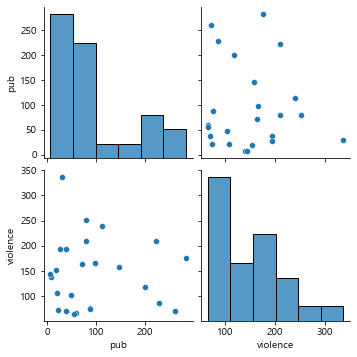

In [40]:
for i in a:
    sns.pairplot(nightlife_crime,vars=["pub",i])
    plt.show()

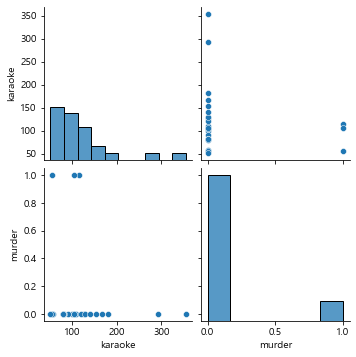

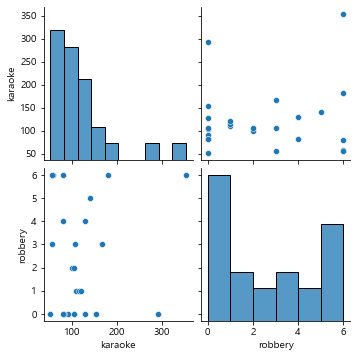

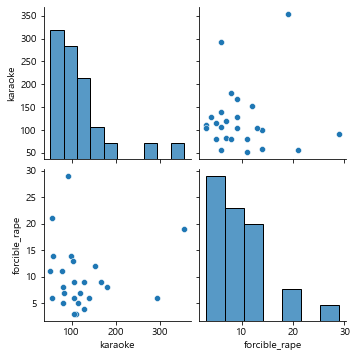

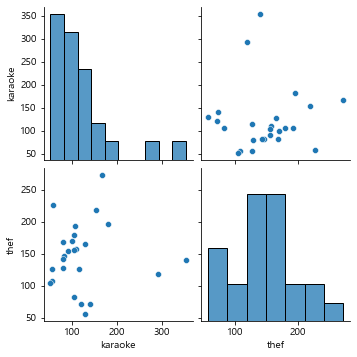

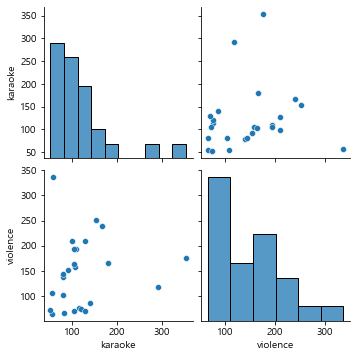

In [41]:
for i in a:
    sns.pairplot(nightlife_crime,vars=["karaoke",i])
    plt.show()

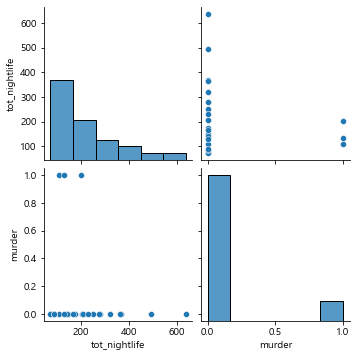

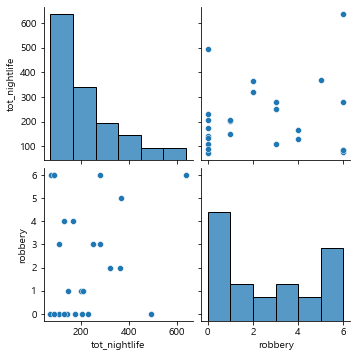

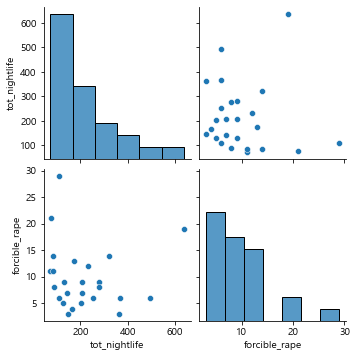

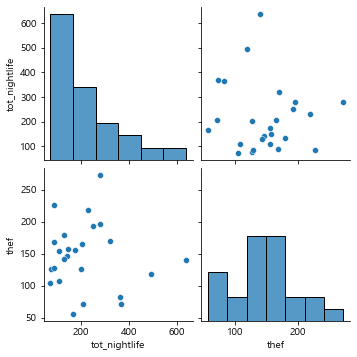

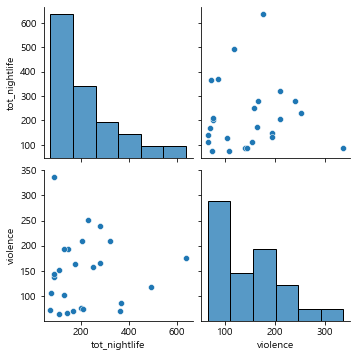

In [42]:
for i in a:
    sns.pairplot(nightlife_crime,vars=["tot_nightlife",i])
    plt.show()

#### 피어슨 상관계수

In [43]:
for i in a:
    print(nightlife_crime.loc[:,("pub",i)].corr(method='pearson'))
    print("-"*30)

             pub    murder
pub     1.000000 -0.166262
murder -0.166262  1.000000
------------------------------
              pub   robbery
pub      1.000000  0.158527
robbery  0.158527  1.000000
------------------------------
                    pub  forcible_rape
pub            1.000000      -0.113338
forcible_rape -0.113338       1.000000
------------------------------
           pub      thef
pub   1.000000 -0.151376
thef -0.151376  1.000000
------------------------------
               pub  violence
pub       1.000000 -0.050001
violence -0.050001  1.000000
------------------------------


In [44]:
%matplotlib inline   
import matplotlib.pyplot as plt 
import seaborn as sns 

<AxesSubplot:>

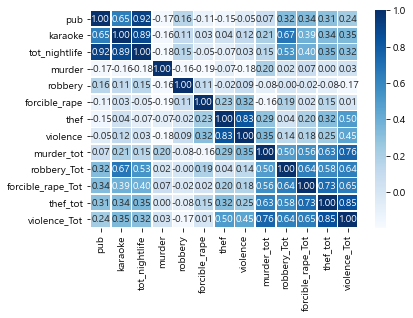

In [45]:
sns.heatmap(data = nightlife_crime.corr(), annot=True,  fmt = '.2f', linewidths=.5, cmap='Blues')